# Final Tutorial: Tidying, Visualizing, and Analyzing NBA Player Data
by Ryan Ying


## Getting Started

In [186]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

First, we import a few important libraries: [pandas](https://pandas.pydata.org/pandas-docs/stable/), [numpy](https://numpy.org/doc/stable/user/), [scikit-learn](https://scikit-learn.org/stable/index.html), and [matplotlib](https://matplotlib.org/stable/users/index.html). Click on each to view the documentation and learn more about what each one does.

### Reading the Data
We read the data from a local .csv file using pandas.

In [43]:
basketball = pd.read_csv("Seasons_Stats.csv")
basketball.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [44]:
# List of all columns in the dataframe. Converted to numpy array for easier visualization.
np.asarray(list(basketball))

array(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS',
       'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS',
       'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'], dtype='<U10')

## Tidying and Modifying the Data
As you can see, the dataset is very comprehensive; it provides all season stats for every player from 1950 to 2017. However, for the purpose of this tutorial, we will simplify the data by only looking at stats from 2010 onward. This is additionally helpful because the recording of stats and the way basketball was played were different in the NBA's early years. For example, the shot clock was added in 1954, while the 3-point line was only added in 1980.

In [45]:
# Drop rows from the dataframe that we most likely won't use. Create copies of the original dataframe so that we can access data that isn't
# relevant now later if we so choose.
nba = basketball[basketball.Year >= 2010]
nba.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
19922,19922,2010.0,Arron Afflalo,SG,24.0,DEN,82.0,75.0,2221.0,10.9,...,0.735,59.0,193.0,252.0,138.0,46.0,30.0,74.0,225.0,724.0
19923,19923,2010.0,Alexis Ajinca,C,21.0,CHA,6.0,0.0,30.0,6.3,...,0.000,1.0,3.0,4.0,0.0,1.0,1.0,2.0,5.0,10.0
19924,19924,2010.0,LaMarcus Aldridge,PF,24.0,POR,78.0,78.0,2922.0,18.2,...,0.757,192.0,435.0,627.0,160.0,67.0,48.0,104.0,231.0,1393.0
19925,19925,2010.0,Joe Alexander,SF,23.0,CHI,8.0,0.0,29.0,2.8,...,0.667,2.0,3.0,5.0,2.0,1.0,1.0,0.0,9.0,4.0
19926,19926,2010.0,Malik Allen,PF,31.0,DEN,51.0,3.0,456.0,5.9,...,0.923,36.0,46.0,82.0,16.0,11.0,5.0,22.0,68.0,105.0


You can tidy data further depending on what you are analyzing the data for. For example, one could group by Team (Tm) and analyze total team statistics or omit players that do not meet certain criteria to create a better representation of the average NBA player. Some examples of this are shown when we begin to analyze this data.

Another thing one could do is add columns representing metrics that are not already represented in the dataset. For example, analysts sometimes reference per-36 stats when considering how efficient a certain player is, generally for bench players who play less than 36 minutes per game. If this metric was of interest to someone performing data analysis, pandas provides simple ways to allow them to calculate it and add it as an additional column to the dataset.

In preparation for some of the Exploratory Data Analysis (EDA) we will be performing on this dataset, let's add a simple column, Minutes Per Game (MPG). 

In [51]:
mpg = nba['MP'] / nba['G']
nba['MPG'] = mpg
nba.head()

<ipython-input-51-addae145b5fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba['MPG'] = mpg


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG
19922,19922,2010.0,Arron Afflalo,SG,24.0,DEN,82.0,75.0,2221.0,10.9,...,59.0,193.0,252.0,138.0,46.0,30.0,74.0,225.0,724.0,27.085366
19923,19923,2010.0,Alexis Ajinca,C,21.0,CHA,6.0,0.0,30.0,6.3,...,1.0,3.0,4.0,0.0,1.0,1.0,2.0,5.0,10.0,5.000000
19924,19924,2010.0,LaMarcus Aldridge,PF,24.0,POR,78.0,78.0,2922.0,18.2,...,192.0,435.0,627.0,160.0,67.0,48.0,104.0,231.0,1393.0,37.461538
19925,19925,2010.0,Joe Alexander,SF,23.0,CHI,8.0,0.0,29.0,2.8,...,2.0,3.0,5.0,2.0,1.0,1.0,0.0,9.0,4.0,3.625000
19926,19926,2010.0,Malik Allen,PF,31.0,DEN,51.0,3.0,456.0,5.9,...,36.0,46.0,82.0,16.0,11.0,5.0,22.0,68.0,105.0,8.941176


## Exploratory Data Analysis


### Plotting Age vs. Player Efficiency Rating (PER)
Player Efficiency Rating, or just Efficiency, is a metric that NBA analysts and statisticians use to estimate a player's efficiency, or how well they produce in regards to how long they play. It is calculated using a simple formula:

$$ PER = (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP $$

Before we plot this, however, we should further tidy our data. PER is a tricky metric because it can be misleadingly high for players with low sample sizes. A handful of NBA players might play less than 10 games or less than 30 total minutes in a season, and these players are usually young players whose coaches want them to develop more and get a better feel for the NBA game before getting consistent minutes. So, they are put into the game towards the ends of not-very-close contests whose victors are all but decided already. If these players play well in the few minutes they play in a season, their PER could be sky-high.

In [52]:
max(nba['PER'])

129.1

In [57]:
nba[nba.PER >= 35]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG
22600,22600,2014.0,DeAndre Liggins,SG,25.0,MIA,1.0,0.0,1.0,129.1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.000000
22919,22919,2015.0,Sim Bhullar,C,22.0,SAC,3.0,0.0,3.0,44.3,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.000000
23269,23269,2015.0,Eric Moreland,PF,23.0,SAC,3.0,0.0,2.0,40.8,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.666667
23681,23681,2016.0,Jimmer Fredette,SG,26.0,NYK,2.0,0.0,5.0,47.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,2.500000
24065,24065,2016.0,Briante Weber,PG,23.0,MIA,1.0,0.0,3.0,39.3,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,3.000000


Of the 5 players 2010 onward with PERs greater than 35, none of them played more than 5 total minutes in a season. So, for our plot, we can filter out the players with such low playing times that they are likely to introduce outliers. The NBA does a similar thing for its statistical leader lists; to avoid listing a player who took and made 1 shot all season as the league's best shooter, it requires that a player play 70% of his team's 82 games to be eligible for a statistical leader list. We don't want to be as strict here, since PERs from players who played about of the 82 games on limited minutes can still be valuable. 

In [59]:
per = nba[nba.G >= 41]
per.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG
19922,19922,2010.0,Arron Afflalo,SG,24.0,DEN,82.0,75.0,2221.0,10.9,...,59.0,193.0,252.0,138.0,46.0,30.0,74.0,225.0,724.0,27.085366
19924,19924,2010.0,LaMarcus Aldridge,PF,24.0,POR,78.0,78.0,2922.0,18.2,...,192.0,435.0,627.0,160.0,67.0,48.0,104.0,231.0,1393.0,37.461538
19926,19926,2010.0,Malik Allen,PF,31.0,DEN,51.0,3.0,456.0,5.9,...,36.0,46.0,82.0,16.0,11.0,5.0,22.0,68.0,105.0,8.941176
19927,19927,2010.0,Ray Allen,SG,34.0,BOS,80.0,80.0,2819.0,15.2,...,45.0,208.0,253.0,210.0,64.0,25.0,129.0,182.0,1304.0,35.237500
19928,19928,2010.0,Tony Allen,SG,28.0,BOS,54.0,8.0,889.0,14.2,...,52.0,93.0,145.0,72.0,59.0,19.0,66.0,109.0,330.0,16.462963


Let's now use matplotlib to make a scatter plot of age vs. PER and see what we can deduce about these values by simply visualizing them.

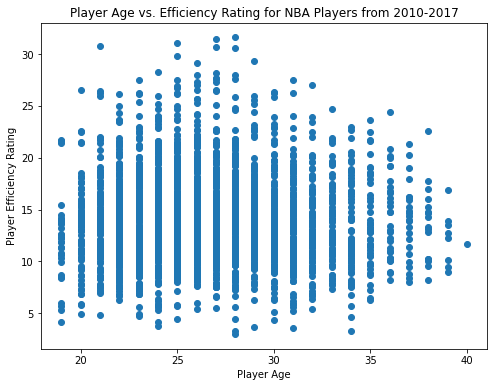

In [70]:
plt.rcParams["figure.figsize"]=(8, 6)
plt.scatter(per['Age'], per['PER'])
plt.title('Player Age vs. Efficiency Rating for NBA Players from 2010-2017')
plt.xlabel('Player Age')
plt.ylabel('Player Efficiency Rating')
plt.show()

By visual inspection, most of the highest PERs were produced by players between 25-30 years old, which is generally regarded in the basketball world as a player's "prime," or the peak of their athletic prowess. As players approach retirement age, which is generally around 35 years old for the average player, PER appears to decrease in general. 

However, it is difficult to make truly accurate statements about a distribution without a model fit to the data. 

## Using Prediction Models

A number of different machine learning models can be used on various datasets to attempt to predict future values or values not included in the dataset. For simplicity, this section will demonstrate fitting a linear regression model to our NBA player data. 

### Predicting Prime PER Using Linear Regression

Since NBA players' efficiency tends to increase as they approach prime age and decrease as they approach retirement age, fitting a linear model across the entire distribution probably wouldn't yield very meaningful results. Instead, we will focus on predicting the PER of players as they approach their prime. The peak age of the average NBA player is around 28 years old, so we will ignore the rest of the dataset's entries.

In [184]:
prime = per[per.Age <= 28]
prime_per = prime.groupby(['Age'],as_index=False)['PER'].mean()

X = np.array(prime['Age']).reshape(-1, 1)
y = np.array(prime['PER']).reshape(-1, 1)

# split into train and test; 80% of data used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

# add prior years for additional comparison
a = basketball[basketball.Year >= 2003]
nba2 = a[a.Year < 2010]
per2 = nba2[nba2.G >= 41]
prime2 = per2[per2.Age <= 28]
prime2 = prime2[prime2.Age > 18]
prime_per2 = prime2.groupby(['Age'],as_index=False)['PER'].mean()


Here, we use the scikit-learn module to create a prediction model. First, we use train_test_split to split the data. 80% of the data is used to train the model, while the remaining 20% is set aside for testing/making a prediction. Then, a prediction using the testing data is made.

Text(0, 0.5, 'Player Efficiency Rating')

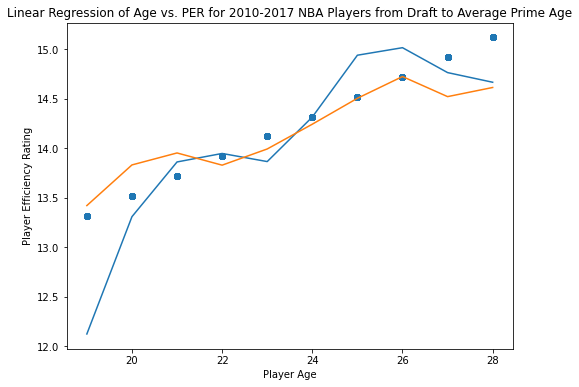

In [185]:
plt.plot(prime_per['Age'],prime_per['PER'])
plt.plot(prime_per2['Age'],prime_per2['PER'])
plt.scatter(X_test,y_pred)
plt.title('Linear Regression of Age vs. PER for 2010-2017 NBA Players from Draft to Average Prime Age')
plt.xlabel('Player Age')
plt.ylabel('Player Efficiency Rating')

When we plot the prediction against the actual average PERs at every age, we can see that the model performed relatively well. The orange line represents average PERs from 2003-2010, the 7 years before the years our model was trained on, for additional comparison. It also demonstrates that our model performed quite well. 

## Conclusion
In this tutorial, we explored EDA and fitting simple machine learning models to just one sports-related dataset. There are countless datasets online regarding crime, social media, disease control, UFO reports, and everything you could imagine in between. There are also several different types of prediction models that can be applied to such datasets. Not every model can be applied to every dataset to produce meaningful results that we as data scientists can learn from, but learning when and how to apply these concepts to get the most out of these tools is incredibly useful. I encourage you to explore further using datasets that interest you and see what kinds of things you can learn! 